# Page Table Implementation

Page size: 4096 bytes  
PTE size: 8 bytes  
Number of Entries: 512 entries  

Remember each process would have its own unique root page table

## Alignment: Memory Eventually Lines Up with Byte 0

If pages are 4096 byte aligned in memory is means **pages always start when the lower 12 bits are zero**, in computing we like alignment

If a page started at address 0x7C00 its last byte would be at address 0x8BFF

**Instead, a page would start at 0x7000 and end at 0x7FFF**

Question: Is address 0xEC 8 byte aligned? $\implies$ C is 1100 $\implies$ Last 3 bits not 0 $\implies$ NO

### How Many Page Tables Do We Need?

Let’s assume our program uses 512 pages 

What’s the minimum number of page tables we need? (for 3 levels)

> Best case - 3 minimum: L2->L1->L0  
> L2 only points to L1, L1 ONLY points to L0, and all entries of L0 (512) points to exactly 512 needed pages

What’s the maximum number of page tables we need?

> Worst case - 1 + 512 + 512  
> L2 (fixed root, only 1) each entry points to 512 different L1 page tables, each L1 points to a different L0 page table, and EACH of the page being used is pointed by 1 L0 table

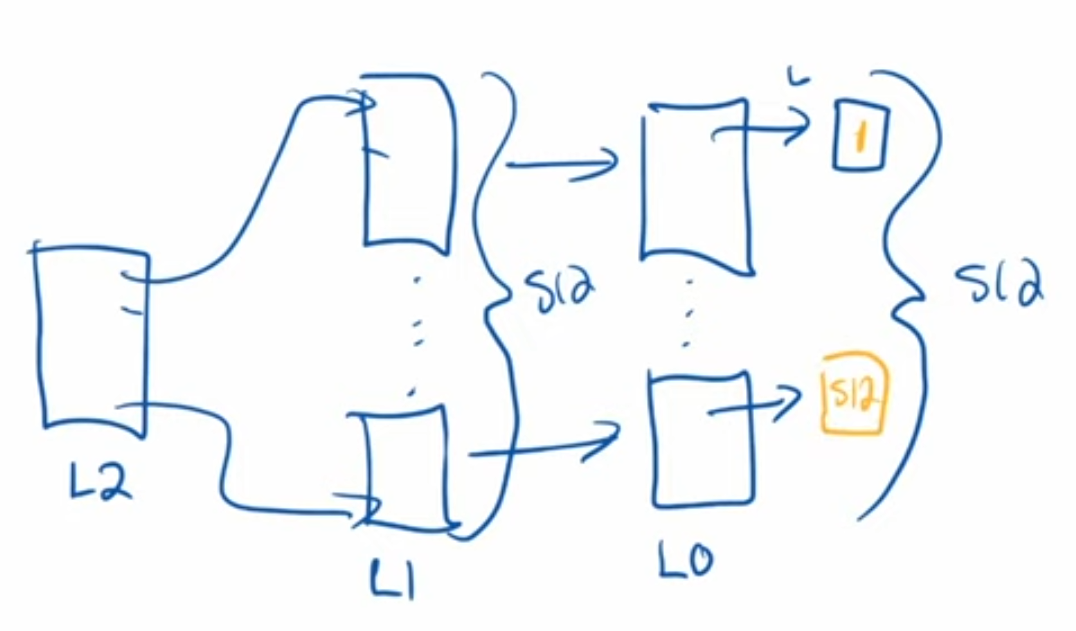


THEREFORE, this is the reason why we choose L0 to be LSB, then L1, then L2, so we want everything to be besides to each other

### How Many Levels Do I Need?

Assume we have a 32-bit virtual address with a page size of 4096 bytes and a PTE size of 4 bytes (since 32 bits PTE)

- Page size = 2^12
- PTE size = 2^2
- Number of PTEs per Page table = 2^10 $\implies$ Need 10 index bits into each page table

10(L1) 10 (L0) 12 (offset)

$\implies$ We have **equation**: (ceil)

$$ Number-of-Levels = \lceil{Virtual Bits−Offset Bits \over Index Bits}\rceil $$

***
# Using the Page Tables for Every Memory Access is Slow

- We need to follow pointers across multiple levels of page tables!
- We’ll likely access the same page multiple times (close to the first access time), if addresses are close to each other
- A process may only need a few VPN → PPN mappings at a time (not always accessing memory)

$\therefore$